In [14]:
import pandas as pd
import datetime
import calendar
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
df_swc = pd.read_csv('swc_learner_count.csv')

In [16]:
df_swc

,date,year,month,learners,workshops,notes
0,2014,2014,NaN,52,2,2 workshops
1,2015,2015,NaN,123,3,3 workshops
2,16-Jan,2016,1.0,19,1,NaN
3,16-Mar,2016,3.0,25,1,NaN
4,16-Apr,2016,4.0,13,1,NaN
5,16-Apr,2016,4.0,10,1,NaN
6,16-Jun,2016,6.0,19,1,NaN
7,16-Aug,2016,8.0,3,1,NaN
8,16-Oct,2016,10.0,4,1,NaN
9,16-Dec,2016,12.0,12,1,NaN


In [17]:
df_swc.learners.sum()


404

In [18]:
df_swc = pd.read_csv('swc_learner_count.csv', infer_datetime_format=True, parse_dates=['date','month'])

In [19]:
df_swc

,date,year,month,learners,workshops,notes
0,2014,2014,nan,52,2,2 workshops
1,2015,2015,nan,123,3,3 workshops
2,16-Jan,2016,1,19,1,NaN
3,16-Mar,2016,3,25,1,NaN
4,16-Apr,2016,4,13,1,NaN
5,16-Apr,2016,4,10,1,NaN
6,16-Jun,2016,6,19,1,NaN
7,16-Aug,2016,8,3,1,NaN
8,16-Oct,2016,10,4,1,NaN
9,16-Dec,2016,12,12,1,NaN


In [20]:
df_g01 = df_swc.groupby('year').sum()

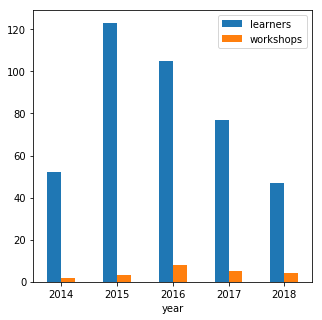

In [21]:
df_g01.plot(kind='bar', figsize=(5,5))
plt.xticks(rotation=0)

plt.show()

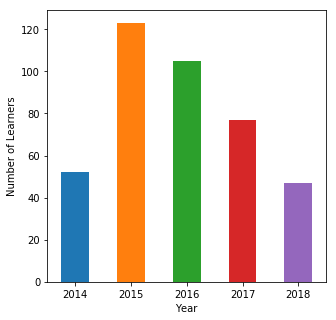

In [22]:
df_g01 = df_swc.groupby(['year']).learners.sum()


df_g01.plot(kind='bar', figsize=(5,5))

plt.xticks(rotation=0)
plt.ylabel('Number of Learners')
plt.xlabel('Year')

plt.show()

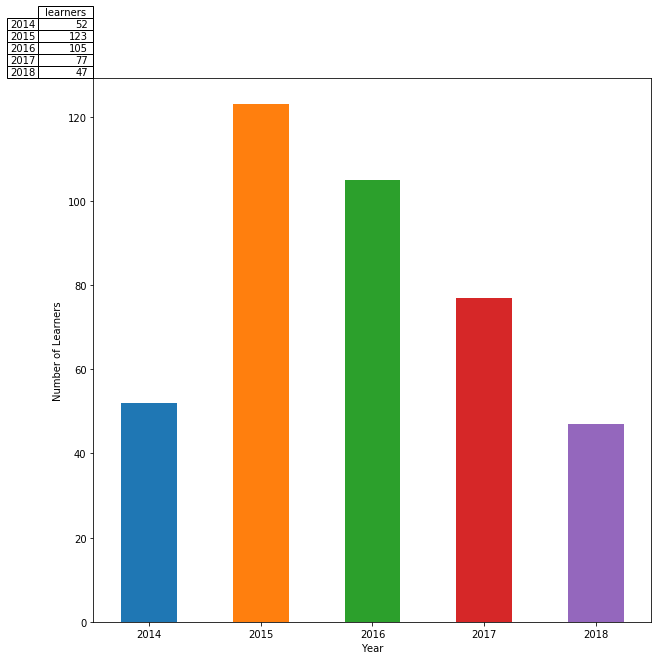

In [23]:
from pandas.plotting import table   

df_g01 = df_swc.groupby(['year']).learners.sum()
df_g02 = df_swc.groupby('year').workshops.sum()

fig, axes = plt.subplots()

df_g01.plot(kind='bar', ax=axes, figsize=(10,10))
table(axes, df_g01, loc='top left', colWidths=[0.1] * 2)

plt.xticks(rotation=0)
plt.ylabel('Number of Learners')
plt.xlabel('Year')

# fig.savefig('swc_learners_count.png', bbox_inches='tight')
plt.show()

In [24]:
frames = [df_g01, df_g02]
tallies = pd.concat(frames, axis=1)

In [25]:
tallies

,learners,workshops
year,,
2014,52,2
2015,123,3
2016,105,8
2017,77,5
2018,47,4


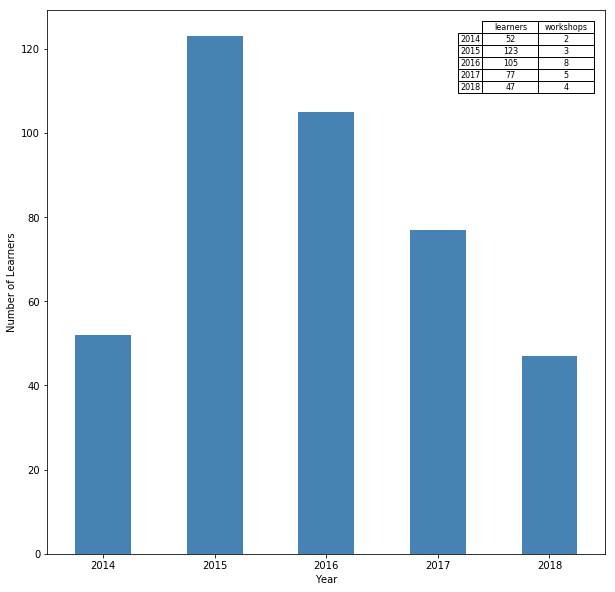

In [26]:

df_g01 = df_swc.groupby(['year']).learners.sum()
df_g02 = df_swc.groupby('year').workshops.sum()

fig, axes = plt.subplots()

df_g01.plot(kind='bar', color='steelblue',ax=axes, figsize=(10,10))
table(axes, tallies, 
      loc='upper right', 
   #   rowLoc = 'center', 
      cellLoc = 'center',
      colWidths=[0.1] * 2)

plt.xticks(rotation=0)
plt.ylabel('Number of Learners')
plt.xlabel('Year')

fig.savefig('plots/swc_learners_count_201804.png',dpi=300, bbox_inches='tight')